In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_data = pd.read_csv("instacart/train_data.csv")
train_data

,user_id,product_id,times_reordered,ratio_prod_bought_dep,ratio_prod_bought_ais,ratio_order_bought_dep,ratio_order_bought_ais,ratio_dist_prod_reordered,ratio_order_bought,num_user_prod_per_order,...,dow_prod_usually_diff,dow_user_usually_diff,hod_prod_usually_diff,hod_user_usually_diff,prod_bought_period_diff_mean,prod_bought_period_diff_user,dow_prod_usually_diff_mean,hod_prod_usually_diff_mean,average_day_period_diff,reordered
0,5,3376.0,0,1.000000,1.000000,1.000000,1.000000,0.347826,0.250000,9.250000,...,1.0,3.0,7,7,43.857478,NaN,0,1,7.333333,0.0
1,5,5999.0,0,0.125000,1.000000,0.333333,1.000000,0.347826,0.250000,9.250000,...,1.0,3.0,7,7,14.883036,NaN,1,2,7.333333,0.0
2,5,6808.0,0,1.000000,1.000000,1.000000,1.000000,0.347826,0.250000,9.250000,...,0.0,3.0,5,7,3.901389,NaN,1,2,7.333333,0.0
3,5,8518.0,1,0.105263,0.333333,0.500000,0.666667,0.347826,0.500000,9.250000,...,1.0,3.0,1,7,39.284354,34.000000,0,0,7.333333,0.0
4,5,11777.0,3,0.210526,0.500000,1.000000,1.000000,0.347826,1.000000,9.250000,...,3.0,3.0,7,7,25.846156,7.333333,0,1,7.333333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061089,206205,43352.0,1,0.285714,1.000000,1.000000,1.000000,0.291667,0.666667,10.666667,...,3.0,1.0,4,4,24.347931,30.000000,1,6,10.000000,0.0
2061090,206205,44471.0,0,1.000000,1.000000,1.000000,1.000000,0.291667,0.333333,10.666667,...,1.0,1.0,1,4,29.211014,NaN,1,1,10.000000,0.0
2061091,206205,46820.0,0,0.071429,1.000000,0.333333,1.000000,0.291667,0.333333,10.666667,...,1.0,1.0,1,4,13.210806,NaN,1,6,10.000000,0.0
2061092,206205,49235.0,0,0.071429,0.500000,0.333333,0.500000,0.291667,0.333333,10.666667,...,3.0,1.0,4,4,13.926171,NaN,1,7,10.000000,0.0


In [3]:
train_data['reordered'].value_counts()

0.0    1857650
1.0     203444
Name: reordered, dtype: int64

# Features meaning
- 'user_id', 
- 'product_id', 
- 'times_reordered' = how many time user reorder this product
- 'ratio_prod_bought_dep' = ratio of this product bought / total product in the same department
- 'ratio_prod_bought_ais',
- 'ratio_order_bought_dep' = ratio of orders contain this product / total orders contain products in the same department 
- 'ratio_order_bought_ais', 
- 'ratio_dist_prod_reordered' = ratio of distinct products that have been reordered
- 'ratio_order_bought' = number of orders contain this item / total orders 
- 'num_user_prod_per_order' = average number of products in an order of this user
- 'reordered_prod_per_order' = proportion of reordered product in an order of this user 
- 'dow_prod_usually_diff' = different in dow that this user usually buy this product 
- 'dow_user_usually_diff' = different in dow that this user usually make an order
- 'hod_prod_usually_diff' = different in hod that this user usually by this product 
- 'hod_user_usually_diff' = different in hod that this user usually make an order
- 'prod_bought_period_diff_mean' = different in period that this user usually buy this product compared to other people
- 'prod_bought_period_diff_user' = different in period that this user usually buy this product compared to himself
- 'dow_prod_usually_diff_mean' = different in dow that this user buy this product compared to other people
- 'hod_prod_usually_diff_mean' = different in hod that this user buy this product compared to other people
- 'average_day_period_diff' = different in period that this user usually make an order
- 'reordered' = label

In [4]:
X = train_data.loc[:, ~train_data.columns.isin(['user_id','product_id','reordered'])]
y = train_data.loc[:, train_data.columns == 'reordered']

In [5]:
X

,times_reordered,ratio_prod_bought_dep,ratio_prod_bought_ais,ratio_order_bought_dep,ratio_order_bought_ais,ratio_dist_prod_reordered,ratio_order_bought,num_user_prod_per_order,reordered_prod_per_order,dow_prod_usually_diff,dow_user_usually_diff,hod_prod_usually_diff,hod_user_usually_diff,prod_bought_period_diff_mean,prod_bought_period_diff_user,dow_prod_usually_diff_mean,hod_prod_usually_diff_mean,average_day_period_diff
0,0,1.000000,1.000000,1.000000,1.000000,0.347826,0.250000,9.250000,0.378378,1.0,3.0,7,7,43.857478,NaN,0,1,7.333333
1,0,0.125000,1.000000,0.333333,1.000000,0.347826,0.250000,9.250000,0.378378,1.0,3.0,7,7,14.883036,NaN,1,2,7.333333
2,0,1.000000,1.000000,1.000000,1.000000,0.347826,0.250000,9.250000,0.378378,0.0,3.0,5,7,3.901389,NaN,1,2,7.333333
3,1,0.105263,0.333333,0.500000,0.666667,0.347826,0.500000,9.250000,0.378378,1.0,3.0,1,7,39.284354,34.000000,0,0,7.333333
4,3,0.210526,0.500000,1.000000,1.000000,0.347826,1.000000,9.250000,0.378378,3.0,3.0,7,7,25.846156,7.333333,0,1,7.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061089,1,0.285714,1.000000,1.000000,1.000000,0.291667,0.666667,10.666667,0.250000,3.0,1.0,4,4,24.347931,30.000000,1,6,10.000000
2061090,0,1.000000,1.000000,1.000000,1.000000,0.291667,0.333333,10.666667,0.250000,1.0,1.0,1,4,29.211014,NaN,1,1,10.000000
2061091,0,0.071429,1.000000,0.333333,1.000000,0.291667,0.333333,10.666667,0.250000,1.0,1.0,1,4,13.210806,NaN,1,6,10.000000
2061092,0,0.071429,0.500000,0.333333,0.500000,0.291667,0.333333,10.666667,0.250000,3.0,1.0,4,4,13.926171,NaN,1,7,10.000000


In [6]:
y

,reordered
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
2061089,0.0
2061090,0.0
2061091,0.0
2061092,0.0


# Train-test split

In [7]:
from sklearn.model_selection import train_test_split
def splitshuffle(X, y, testsize=0.2, state=42):
    return train_test_split(X, y, test_size=testsize, shuffle=True, random_state=state)

In [8]:
X_train, X_test, y_train, y_test = splitshuffle(X,y)

In [9]:
X_train

,times_reordered,ratio_prod_bought_dep,ratio_prod_bought_ais,ratio_order_bought_dep,ratio_order_bought_ais,ratio_dist_prod_reordered,ratio_order_bought,num_user_prod_per_order,reordered_prod_per_order,dow_prod_usually_diff,dow_user_usually_diff,hod_prod_usually_diff,hod_user_usually_diff,prod_bought_period_diff_mean,prod_bought_period_diff_user,dow_prod_usually_diff_mean,hod_prod_usually_diff_mean,average_day_period_diff
1965652,1,0.285714,1.000000,0.285714,1.000000,0.596273,0.048780,15.756098,0.750774,1.0,1.0,6,3,113.829951,141.0,1,7,1.125000
1641170,0,0.250000,1.000000,0.500000,1.000000,0.173913,0.200000,10.800000,0.148148,0.0,0.0,0,0,20.276081,NaN,3,2,7.500000
261596,0,0.125000,1.000000,0.125000,1.000000,0.608247,0.034483,23.206897,0.711738,3.0,0.0,3,1,89.291001,NaN,0,5,5.535714
504023,0,0.100000,1.000000,0.111111,1.000000,0.629482,0.027778,31.833333,0.780977,0.0,0.0,5,5,126.000000,NaN,1,7,4.028571
1198016,0,0.025641,0.125000,0.058824,0.125000,0.467836,0.052632,22.421053,0.598592,1.0,1.0,3,3,19.464576,NaN,0,3,1.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,0,0.021277,0.142857,0.033333,0.142857,0.690141,0.012987,18.168831,0.847748,3.0,3.0,11,13,142.762500,NaN,2,11,1.302632
1414414,1,0.062500,0.181818,0.083333,0.222222,0.673759,0.028571,26.800000,0.849680,2.0,2.0,1,1,175.586496,97.0,5,4,3.260870
131932,0,0.058824,0.100000,0.250000,0.250000,0.318182,0.250000,7.750000,0.290323,1.0,1.0,8,5,61.492083,NaN,0,2,4.000000
671155,0,0.020408,0.333333,0.045455,0.333333,0.456376,0.023810,10.095238,0.648585,0.0,0.0,0,1,168.330972,NaN,5,1,1.365854


In [10]:
y_train

,reordered
1965652,0.0
1641170,0.0
261596,0.0
504023,0.0
1198016,1.0
...,...
259178,0.0
1414414,0.0
131932,0.0
671155,0.0


In [11]:
y_train.value_counts()

reordered
0.0          1486360
1.0           162515
dtype: int64

In [12]:
1486360/162515

9.145986524320833

In [13]:
y_test.value_counts()

reordered
0.0          371290
1.0           40929
dtype: int64

In [14]:
371290/40929

9.071562950475213

# Train

In [49]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(scale_pos_weight=9.1, iterations=2000)
model.fit(X_train,
          y_train)

Learning rate set to 0.129012
0:	learn: 0.6532598	total: 708ms	remaining: 23m 34s
1:	learn: 0.6240931	total: 1.4s	remaining: 23m 21s
2:	learn: 0.6027397	total: 2.19s	remaining: 24m 21s
3:	learn: 0.5867839	total: 2.9s	remaining: 24m 9s
4:	learn: 0.5749939	total: 3.59s	remaining: 23m 52s
5:	learn: 0.5660924	total: 4.25s	remaining: 23m 31s
6:	learn: 0.5586516	total: 4.91s	remaining: 23m 17s
7:	learn: 0.5535978	total: 5.53s	remaining: 22m 55s
8:	learn: 0.5495249	total: 6.23s	remaining: 22m 59s
9:	learn: 0.5457618	total: 6.96s	remaining: 23m 5s
10:	learn: 0.5432132	total: 7.61s	remaining: 22m 56s
11:	learn: 0.5410887	total: 8.28s	remaining: 22m 52s
12:	learn: 0.5391301	total: 9.03s	remaining: 22m 59s
13:	learn: 0.5378810	total: 9.62s	remaining: 22m 44s
14:	learn: 0.5365576	total: 10.2s	remaining: 22m 34s
15:	learn: 0.5357283	total: 11s	remaining: 22m 42s
16:	learn: 0.5348724	total: 11.7s	remaining: 22m 47s
17:	learn: 0.5341661	total: 12.4s	remaining: 22m 43s
18:	learn: 0.5335582	total: 13.2

154:	learn: 0.5225893	total: 1m 50s	remaining: 21m 54s
155:	learn: 0.5225558	total: 1m 51s	remaining: 21m 54s
156:	learn: 0.5225174	total: 1m 51s	remaining: 21m 54s
157:	learn: 0.5224771	total: 1m 52s	remaining: 21m 54s
158:	learn: 0.5224319	total: 1m 53s	remaining: 21m 54s
159:	learn: 0.5224014	total: 1m 54s	remaining: 21m 53s
160:	learn: 0.5223652	total: 1m 54s	remaining: 21m 52s
161:	learn: 0.5223223	total: 1m 55s	remaining: 21m 51s
162:	learn: 0.5222798	total: 1m 56s	remaining: 21m 50s
163:	learn: 0.5222534	total: 1m 57s	remaining: 21m 51s
164:	learn: 0.5222094	total: 1m 57s	remaining: 21m 51s
165:	learn: 0.5221708	total: 1m 58s	remaining: 21m 50s
166:	learn: 0.5221299	total: 1m 59s	remaining: 21m 50s
167:	learn: 0.5220955	total: 2m	remaining: 21m 49s
168:	learn: 0.5220575	total: 2m	remaining: 21m 49s
169:	learn: 0.5220199	total: 2m 1s	remaining: 21m 47s
170:	learn: 0.5219850	total: 2m 2s	remaining: 21m 46s
171:	learn: 0.5219642	total: 2m 2s	remaining: 21m 45s
172:	learn: 0.5219280

305:	learn: 0.5177907	total: 3m 40s	remaining: 20m 22s
306:	learn: 0.5177634	total: 3m 41s	remaining: 20m 22s
307:	learn: 0.5177304	total: 3m 42s	remaining: 20m 22s
308:	learn: 0.5177039	total: 3m 43s	remaining: 20m 21s
309:	learn: 0.5176717	total: 3m 43s	remaining: 20m 20s
310:	learn: 0.5176409	total: 3m 44s	remaining: 20m 19s
311:	learn: 0.5176045	total: 3m 45s	remaining: 20m 19s
312:	learn: 0.5175666	total: 3m 46s	remaining: 20m 18s
313:	learn: 0.5175457	total: 3m 46s	remaining: 20m 18s
314:	learn: 0.5175225	total: 3m 47s	remaining: 20m 17s
315:	learn: 0.5174982	total: 3m 48s	remaining: 20m 16s
316:	learn: 0.5174652	total: 3m 49s	remaining: 20m 16s
317:	learn: 0.5174325	total: 3m 49s	remaining: 20m 15s
318:	learn: 0.5174037	total: 3m 50s	remaining: 20m 14s
319:	learn: 0.5173862	total: 3m 51s	remaining: 20m 14s
320:	learn: 0.5173720	total: 3m 51s	remaining: 20m 13s
321:	learn: 0.5173386	total: 3m 52s	remaining: 20m 12s
322:	learn: 0.5173111	total: 3m 53s	remaining: 20m 12s
323:	learn

456:	learn: 0.5139206	total: 5m 32s	remaining: 18m 43s
457:	learn: 0.5138960	total: 5m 33s	remaining: 18m 42s
458:	learn: 0.5138691	total: 5m 34s	remaining: 18m 42s
459:	learn: 0.5138409	total: 5m 35s	remaining: 18m 41s
460:	learn: 0.5138184	total: 5m 35s	remaining: 18m 41s
461:	learn: 0.5138012	total: 5m 36s	remaining: 18m 40s
462:	learn: 0.5137779	total: 5m 37s	remaining: 18m 39s
463:	learn: 0.5137540	total: 5m 37s	remaining: 18m 38s
464:	learn: 0.5137346	total: 5m 38s	remaining: 18m 38s
465:	learn: 0.5137067	total: 5m 39s	remaining: 18m 37s
466:	learn: 0.5136894	total: 5m 39s	remaining: 18m 36s
467:	learn: 0.5136634	total: 5m 40s	remaining: 18m 35s
468:	learn: 0.5136428	total: 5m 41s	remaining: 18m 34s
469:	learn: 0.5136217	total: 5m 42s	remaining: 18m 34s
470:	learn: 0.5136016	total: 5m 42s	remaining: 18m 33s
471:	learn: 0.5135746	total: 5m 43s	remaining: 18m 32s
472:	learn: 0.5135506	total: 5m 44s	remaining: 18m 31s
473:	learn: 0.5135131	total: 5m 45s	remaining: 18m 31s
474:	learn

607:	learn: 0.5104320	total: 7m 25s	remaining: 16m 59s
608:	learn: 0.5104082	total: 7m 26s	remaining: 16m 58s
609:	learn: 0.5103798	total: 7m 26s	remaining: 16m 58s
610:	learn: 0.5103609	total: 7m 27s	remaining: 16m 57s
611:	learn: 0.5103280	total: 7m 28s	remaining: 16m 56s
612:	learn: 0.5103124	total: 7m 28s	remaining: 16m 55s
613:	learn: 0.5102958	total: 7m 29s	remaining: 16m 54s
614:	learn: 0.5102830	total: 7m 30s	remaining: 16m 54s
615:	learn: 0.5102626	total: 7m 31s	remaining: 16m 53s
616:	learn: 0.5102356	total: 7m 31s	remaining: 16m 52s
617:	learn: 0.5102132	total: 7m 32s	remaining: 16m 51s
618:	learn: 0.5101930	total: 7m 33s	remaining: 16m 51s
619:	learn: 0.5101757	total: 7m 33s	remaining: 16m 50s
620:	learn: 0.5101516	total: 7m 34s	remaining: 16m 49s
621:	learn: 0.5101148	total: 7m 35s	remaining: 16m 49s
622:	learn: 0.5100947	total: 7m 36s	remaining: 16m 48s
623:	learn: 0.5100773	total: 7m 37s	remaining: 16m 47s
624:	learn: 0.5100586	total: 7m 37s	remaining: 16m 47s
625:	learn

757:	learn: 0.5072187	total: 9m 18s	remaining: 15m 14s
758:	learn: 0.5072045	total: 9m 18s	remaining: 15m 13s
759:	learn: 0.5071863	total: 9m 19s	remaining: 15m 13s
760:	learn: 0.5071674	total: 9m 20s	remaining: 15m 12s
761:	learn: 0.5071469	total: 9m 21s	remaining: 15m 11s
762:	learn: 0.5071210	total: 9m 21s	remaining: 15m 10s
763:	learn: 0.5071013	total: 9m 22s	remaining: 15m 9s
764:	learn: 0.5070726	total: 9m 23s	remaining: 15m 8s
765:	learn: 0.5070558	total: 9m 23s	remaining: 15m 8s
766:	learn: 0.5070452	total: 9m 24s	remaining: 15m 7s
767:	learn: 0.5070244	total: 9m 25s	remaining: 15m 6s
768:	learn: 0.5070054	total: 9m 26s	remaining: 15m 6s
769:	learn: 0.5069888	total: 9m 26s	remaining: 15m 5s
770:	learn: 0.5069672	total: 9m 27s	remaining: 15m 4s
771:	learn: 0.5069499	total: 9m 28s	remaining: 15m 3s
772:	learn: 0.5069233	total: 9m 28s	remaining: 15m 3s
773:	learn: 0.5069056	total: 9m 29s	remaining: 15m 2s
774:	learn: 0.5068876	total: 9m 30s	remaining: 15m 1s
775:	learn: 0.5068604	

906:	learn: 0.5042020	total: 11m 12s	remaining: 13m 30s
907:	learn: 0.5041900	total: 11m 13s	remaining: 13m 29s
908:	learn: 0.5041730	total: 11m 14s	remaining: 13m 29s
909:	learn: 0.5041564	total: 11m 15s	remaining: 13m 28s
910:	learn: 0.5041399	total: 11m 16s	remaining: 13m 28s
911:	learn: 0.5041162	total: 11m 17s	remaining: 13m 27s
912:	learn: 0.5041045	total: 11m 18s	remaining: 13m 27s
913:	learn: 0.5040843	total: 11m 19s	remaining: 13m 26s
914:	learn: 0.5040657	total: 11m 19s	remaining: 13m 26s
915:	learn: 0.5040417	total: 11m 20s	remaining: 13m 25s
916:	learn: 0.5040172	total: 11m 21s	remaining: 13m 25s
917:	learn: 0.5040035	total: 11m 22s	remaining: 13m 24s
918:	learn: 0.5039824	total: 11m 23s	remaining: 13m 24s
919:	learn: 0.5039682	total: 11m 24s	remaining: 13m 23s
920:	learn: 0.5039433	total: 11m 25s	remaining: 13m 23s
921:	learn: 0.5039198	total: 11m 26s	remaining: 13m 22s
922:	learn: 0.5038968	total: 11m 27s	remaining: 13m 22s
923:	learn: 0.5038728	total: 11m 28s	remaining: 

1053:	learn: 0.5012920	total: 13m 4s	remaining: 11m 44s
1054:	learn: 0.5012635	total: 13m 5s	remaining: 11m 43s
1055:	learn: 0.5012463	total: 13m 6s	remaining: 11m 42s
1056:	learn: 0.5012255	total: 13m 6s	remaining: 11m 41s
1057:	learn: 0.5012024	total: 13m 7s	remaining: 11m 41s
1058:	learn: 0.5011824	total: 13m 8s	remaining: 11m 40s
1059:	learn: 0.5011639	total: 13m 8s	remaining: 11m 39s
1060:	learn: 0.5011375	total: 13m 9s	remaining: 11m 38s
1061:	learn: 0.5011072	total: 13m 10s	remaining: 11m 38s
1062:	learn: 0.5010824	total: 13m 11s	remaining: 11m 37s
1063:	learn: 0.5010619	total: 13m 11s	remaining: 11m 36s
1064:	learn: 0.5010386	total: 13m 12s	remaining: 11m 35s
1065:	learn: 0.5010201	total: 13m 13s	remaining: 11m 35s
1066:	learn: 0.5010032	total: 13m 14s	remaining: 11m 34s
1067:	learn: 0.5009871	total: 13m 14s	remaining: 11m 33s
1068:	learn: 0.5009689	total: 13m 15s	remaining: 11m 32s
1069:	learn: 0.5009520	total: 13m 16s	remaining: 11m 32s
1070:	learn: 0.5009319	total: 13m 17s	r

1198:	learn: 0.4985514	total: 14m 50s	remaining: 9m 54s
1199:	learn: 0.4985332	total: 14m 50s	remaining: 9m 53s
1200:	learn: 0.4985223	total: 14m 51s	remaining: 9m 53s
1201:	learn: 0.4985089	total: 14m 52s	remaining: 9m 52s
1202:	learn: 0.4984953	total: 14m 53s	remaining: 9m 51s
1203:	learn: 0.4984780	total: 14m 53s	remaining: 9m 50s
1204:	learn: 0.4984571	total: 14m 54s	remaining: 9m 50s
1205:	learn: 0.4984312	total: 14m 55s	remaining: 9m 49s
1206:	learn: 0.4984126	total: 14m 56s	remaining: 9m 48s
1207:	learn: 0.4984022	total: 14m 56s	remaining: 9m 47s
1208:	learn: 0.4983810	total: 14m 57s	remaining: 9m 47s
1209:	learn: 0.4983640	total: 14m 58s	remaining: 9m 46s
1210:	learn: 0.4983445	total: 14m 59s	remaining: 9m 45s
1211:	learn: 0.4983292	total: 14m 59s	remaining: 9m 45s
1212:	learn: 0.4983087	total: 15m	remaining: 9m 44s
1213:	learn: 0.4982843	total: 15m 1s	remaining: 9m 43s
1214:	learn: 0.4982640	total: 15m 2s	remaining: 9m 42s
1215:	learn: 0.4982456	total: 15m 2s	remaining: 9m 42s

1346:	learn: 0.4958575	total: 16m 39s	remaining: 8m 4s
1347:	learn: 0.4958353	total: 16m 40s	remaining: 8m 3s
1348:	learn: 0.4958226	total: 16m 41s	remaining: 8m 3s
1349:	learn: 0.4958111	total: 16m 41s	remaining: 8m 2s
1350:	learn: 0.4957972	total: 16m 42s	remaining: 8m 1s
1351:	learn: 0.4957776	total: 16m 43s	remaining: 8m
1352:	learn: 0.4957577	total: 16m 44s	remaining: 8m
1353:	learn: 0.4957422	total: 16m 45s	remaining: 7m 59s
1354:	learn: 0.4957264	total: 16m 45s	remaining: 7m 58s
1355:	learn: 0.4957124	total: 16m 46s	remaining: 7m 58s
1356:	learn: 0.4956979	total: 16m 47s	remaining: 7m 57s
1357:	learn: 0.4956789	total: 16m 47s	remaining: 7m 56s
1358:	learn: 0.4956635	total: 16m 48s	remaining: 7m 55s
1359:	learn: 0.4956511	total: 16m 49s	remaining: 7m 55s
1360:	learn: 0.4956268	total: 16m 50s	remaining: 7m 54s
1361:	learn: 0.4956129	total: 16m 50s	remaining: 7m 53s
1362:	learn: 0.4955975	total: 16m 51s	remaining: 7m 52s
1363:	learn: 0.4955795	total: 16m 52s	remaining: 7m 52s
1364:

1494:	learn: 0.4933859	total: 18m 28s	remaining: 6m 14s
1495:	learn: 0.4933624	total: 18m 29s	remaining: 6m 13s
1496:	learn: 0.4933439	total: 18m 30s	remaining: 6m 13s
1497:	learn: 0.4933314	total: 18m 30s	remaining: 6m 12s
1498:	learn: 0.4933063	total: 18m 31s	remaining: 6m 11s
1499:	learn: 0.4932915	total: 18m 32s	remaining: 6m 10s
1500:	learn: 0.4932756	total: 18m 33s	remaining: 6m 10s
1501:	learn: 0.4932620	total: 18m 33s	remaining: 6m 9s
1502:	learn: 0.4932463	total: 18m 34s	remaining: 6m 8s
1503:	learn: 0.4932308	total: 18m 35s	remaining: 6m 7s
1504:	learn: 0.4932132	total: 18m 36s	remaining: 6m 7s
1505:	learn: 0.4931970	total: 18m 36s	remaining: 6m 6s
1506:	learn: 0.4931853	total: 18m 37s	remaining: 6m 5s
1507:	learn: 0.4931673	total: 18m 38s	remaining: 6m 4s
1508:	learn: 0.4931535	total: 18m 39s	remaining: 6m 4s
1509:	learn: 0.4931272	total: 18m 39s	remaining: 6m 3s
1510:	learn: 0.4931064	total: 18m 40s	remaining: 6m 2s
1511:	learn: 0.4930898	total: 18m 41s	remaining: 6m 1s
151

1642:	learn: 0.4909078	total: 20m 16s	remaining: 4m 24s
1643:	learn: 0.4908889	total: 20m 17s	remaining: 4m 23s
1644:	learn: 0.4908735	total: 20m 17s	remaining: 4m 22s
1645:	learn: 0.4908586	total: 20m 18s	remaining: 4m 22s
1646:	learn: 0.4908466	total: 20m 19s	remaining: 4m 21s
1647:	learn: 0.4908273	total: 20m 19s	remaining: 4m 20s
1648:	learn: 0.4908076	total: 20m 20s	remaining: 4m 19s
1649:	learn: 0.4907924	total: 20m 21s	remaining: 4m 19s
1650:	learn: 0.4907756	total: 20m 22s	remaining: 4m 18s
1651:	learn: 0.4907537	total: 20m 22s	remaining: 4m 17s
1652:	learn: 0.4907385	total: 20m 23s	remaining: 4m 16s
1653:	learn: 0.4907174	total: 20m 24s	remaining: 4m 16s
1654:	learn: 0.4907007	total: 20m 25s	remaining: 4m 15s
1655:	learn: 0.4906821	total: 20m 25s	remaining: 4m 14s
1656:	learn: 0.4906655	total: 20m 26s	remaining: 4m 13s
1657:	learn: 0.4906488	total: 20m 27s	remaining: 4m 13s
1658:	learn: 0.4906343	total: 20m 28s	remaining: 4m 12s
1659:	learn: 0.4906167	total: 20m 28s	remaining:

1790:	learn: 0.4884900	total: 22m 5s	remaining: 2m 34s
1791:	learn: 0.4884740	total: 22m 6s	remaining: 2m 33s
1792:	learn: 0.4884567	total: 22m 6s	remaining: 2m 33s
1793:	learn: 0.4884383	total: 22m 7s	remaining: 2m 32s
1794:	learn: 0.4884238	total: 22m 8s	remaining: 2m 31s
1795:	learn: 0.4883998	total: 22m 9s	remaining: 2m 30s
1796:	learn: 0.4883835	total: 22m 9s	remaining: 2m 30s
1797:	learn: 0.4883656	total: 22m 10s	remaining: 2m 29s
1798:	learn: 0.4883474	total: 22m 11s	remaining: 2m 28s
1799:	learn: 0.4883358	total: 22m 12s	remaining: 2m 28s
1800:	learn: 0.4883246	total: 22m 12s	remaining: 2m 27s
1801:	learn: 0.4883141	total: 22m 13s	remaining: 2m 26s
1802:	learn: 0.4883039	total: 22m 14s	remaining: 2m 25s
1803:	learn: 0.4882915	total: 22m 15s	remaining: 2m 25s
1804:	learn: 0.4882796	total: 22m 15s	remaining: 2m 24s
1805:	learn: 0.4882657	total: 22m 16s	remaining: 2m 23s
1806:	learn: 0.4882520	total: 22m 17s	remaining: 2m 22s
1807:	learn: 0.4882384	total: 22m 17s	remaining: 2m 22s

1938:	learn: 0.4862259	total: 23m 53s	remaining: 45.1s
1939:	learn: 0.4862062	total: 23m 54s	remaining: 44.4s
1940:	learn: 0.4861887	total: 23m 55s	remaining: 43.6s
1941:	learn: 0.4861743	total: 23m 56s	remaining: 42.9s
1942:	learn: 0.4861636	total: 23m 57s	remaining: 42.2s
1943:	learn: 0.4861498	total: 23m 57s	remaining: 41.4s
1944:	learn: 0.4861345	total: 23m 58s	remaining: 40.7s
1945:	learn: 0.4861159	total: 23m 59s	remaining: 40s
1946:	learn: 0.4860975	total: 24m	remaining: 39.2s
1947:	learn: 0.4860769	total: 24m 1s	remaining: 38.5s
1948:	learn: 0.4860582	total: 24m 2s	remaining: 37.7s
1949:	learn: 0.4860471	total: 24m 2s	remaining: 37s
1950:	learn: 0.4860367	total: 24m 3s	remaining: 36.3s
1951:	learn: 0.4860228	total: 24m 4s	remaining: 35.5s
1952:	learn: 0.4860112	total: 24m 5s	remaining: 34.8s
1953:	learn: 0.4860012	total: 24m 5s	remaining: 34s
1954:	learn: 0.4859808	total: 24m 6s	remaining: 33.3s
1955:	learn: 0.4859594	total: 24m 7s	remaining: 32.6s
1956:	learn: 0.4859410	total:

In [72]:
model.feature_importances_

array([ 4.26200331,  4.49537226,  3.9095948 ,  3.82554265,  3.57738688,
        7.261754  , 17.8747786 ,  6.41846869,  6.57715426,  1.71123894,
        1.28296077,  2.9576516 ,  2.92600009, 14.93385218,  6.6379637 ,
        2.01402796,  2.2045131 ,  7.12973622])

In [73]:
model.best_score_

{'learn': {'Logloss': 0.4852717866756887}}

In [74]:
model.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'Logloss',
 'iterations': 2000,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': False,
 'model_size_reg': 0.5,
 'subsample': 0.800000011920929,
 'use_best_model': False,
 'class_names': [0, 1],
 'random_seed': 0,
 'depth': 6,
 'border_count': 254,
 'class_weights': [1, 9.100000381469728],
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'loss_function': 'Logloss',
 'learning_rate': 0.12901200354099274,
 'score_function': 'Cosine',
 'task_type': 'CPU',
 'leaf_estimation_iterations

## Feature importance
- shows how much on average the prediction changes if the feature value changes (for each feature)
- determine by gain when a feature is used for splitting?
- normalized so that the sum of importances of all features is equal to 100

From chart below, the order of importances:
- ratio order bought = number of time this product bought / total order
- prod_bought_period_diff_mean = difference in period people usually buy this product
- ratio_dist_prod_reordered = number of distinct products reordered / total distinct products of this user
- average_day_period_diff = difference in normal period this user usually make an order
- prod_bought_period_diff_user = difference in normal period this user usually buy this product

and we can see that hour of the day and day of the week don't really impact whether the user will 
buy any specific product again

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_importance(importance,names,model_type):
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

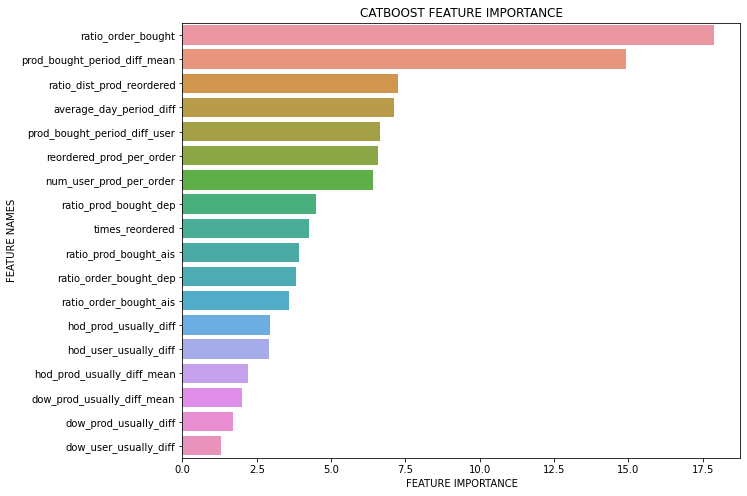

In [76]:
plot_feature_importance(model.get_feature_importance(),X_train.columns,'CATBOOST')

## Shap values
- contributions of each feature to the prediction for every input object

there are a couple of features getting up:
- ratio_prod_bought_ais = ratio of this product bought / products bought of the same aisle of this user
- reordered_prod_per_order = ratio of reordered products in a single order of this user

similarly, hod and dow don't impact much but we can see that if the difference of hod/dow of product bought
of this user is low = a little higher chance to reorder

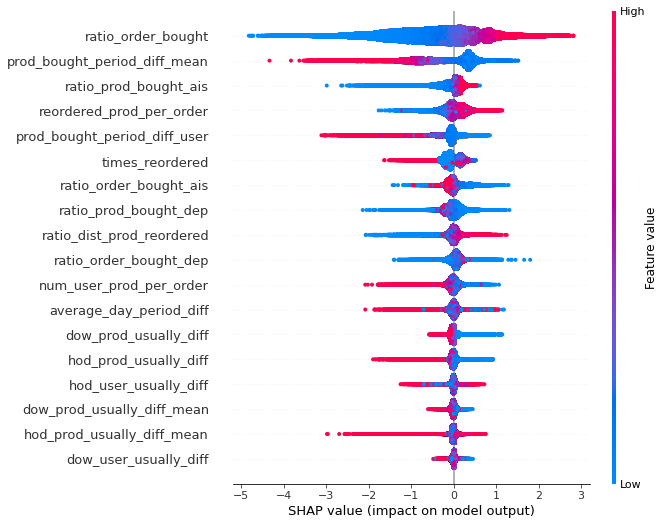

In [78]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train, y_train)
shap.summary_plot(shap_values, X_train)

In [105]:
shap.force_plot(explainer.expected_value, shap_values[100,:], X_train.iloc[100,:])

In [107]:
shap.force_plot(explainer.expected_value, shap_values[300,:], X_train.iloc[300,:])

In [118]:
shap.force_plot(explainer.expected_value, shap_values[400,:], X_train.iloc[400,:])

## Metrics

In [79]:
y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [80]:
# number of predicted 0 and 1
# the ratio of 0 and 1 are not like in the dataset of 9:1
(unique, counts) = np.unique(y_pred, return_counts=True)
frequencies = np.asarray((unique, counts)).T
frequencies

array([[0.00000e+00, 2.94283e+05],
       [1.00000e+00, 1.17936e+05]])

### accuracy & confusion matrix

In [81]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.758344472234419

In [82]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, model.predict(X_train))

0.7653642635130012

In [83]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[282979,  88311],
       [ 11304,  29625]], dtype=int64)

In [84]:
confusion_matrix(y_train, model.predict(X_train))

array([[1138467,  347893],
       [  38992,  123523]], dtype=int64)

### ROC & precision-recall
- the model did pretty good on predicting negative but not positive
- if model predict 0 = likely correct
- if model predict 1 = likely incorrect

In [85]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['negative', 'positive']))

              precision    recall  f1-score   support

    negative       0.96      0.76      0.85    371290
    positive       0.25      0.72      0.37     40929

    accuracy                           0.76    412219
   macro avg       0.61      0.74      0.61    412219
weighted avg       0.89      0.76      0.80    412219



- False positive rate = FP / all real negatives
- True positive rate = TP / all real positives

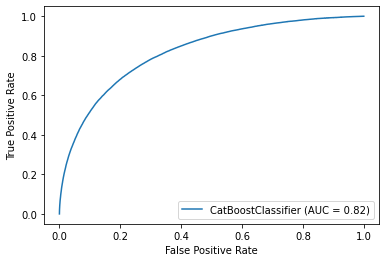

In [86]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model, X_test, y_test);

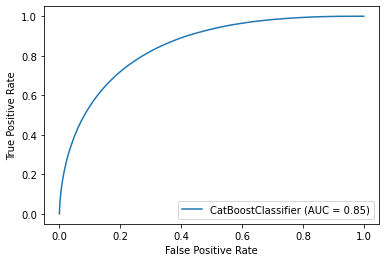

In [87]:
plot_roc_curve(model, X_train, y_train);

- precision-recall curve only takes positive into account

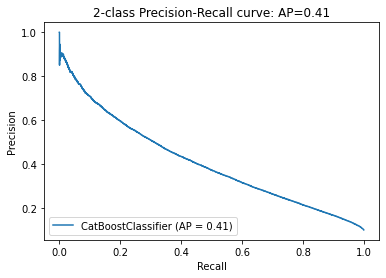

In [60]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, average_precision_score

y_score = model.predict_proba(X_test)[:,1]
average_precision = average_precision_score(y_test, y_score)
disp = plot_precision_recall_curve(model, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision));

## Select threshold

In [89]:
pos_prob_test = model.predict_proba(X_test)[:,1]
pos_prob_test

array([0.39666221, 0.21735808, 0.33124866, ..., 0.2673285 , 0.16735841,
       0.08547082])

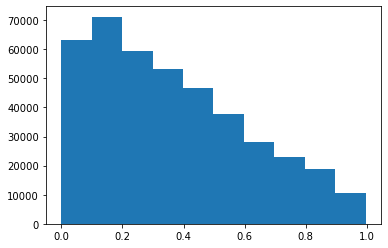

In [95]:
plt.hist(pos_prob_test);

In [90]:
pos_prob_train = model.predict_proba(X_train)[:,1]
pos_prob_train

array([0.17827139, 0.47646018, 0.14153365, ..., 0.49194809, 0.08332417,
       0.15111303])

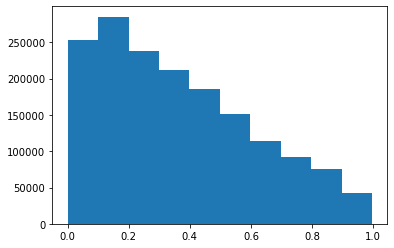

In [96]:
plt.hist(pos_prob_train);

### Threshold = 0.74
- Select the threshold so that the number of negative : positive is about 9:1
- This way, when model predict positive, we have a higher precision at an expense of recall

In [101]:
ypred_thres = np.where(pos_prob_test < 0.74, 0, 1)

In [102]:
(unique, counts) = np.unique(ypred_thres, return_counts=True)
frequencies = np.asarray((unique, counts)).T
frequencies

array([[     0, 369818],
       [     1,  42401]], dtype=int64)

In [103]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, ypred_thres)

array([[346520,  24770],
       [ 23298,  17631]], dtype=int64)

In [104]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred_thres, target_names=['negative', 'positive']))

              precision    recall  f1-score   support

    negative       0.94      0.93      0.94    371290
    positive       0.42      0.43      0.42     40929

    accuracy                           0.88    412219
   macro avg       0.68      0.68      0.68    412219
weighted avg       0.89      0.88      0.88    412219



In [120]:
model.save_model('./model/first_model',
           format="cbm",
           export_parameters=None)